# TASK 1: REGRESSION ANALYSIS

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [52]:
X = df.drop('target', axis=1)
y = df['target']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 2900.19362849348
R² Score: 0.4526027629719197


In [57]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients

,Feature,Coefficient
0,age,37.904021
1,sex,-241.964362
2,bmi,542.428759
3,bp,347.703844
4,s1,-931.488846
5,s2,518.062277
6,s3,163.419983
7,s4,275.317902
8,s5,736.198859
9,s6,48.670657


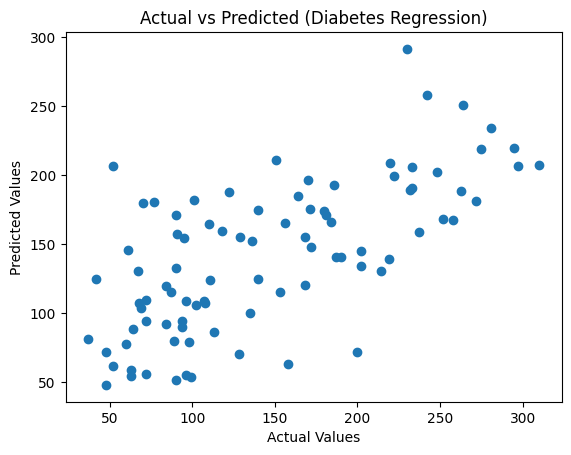

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Diabetes Regression)")
plt.show()

# TIME SERIES ANALYSIS

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
df = pd.read_csv("Stock Prices Data Set.csv")

df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [61]:
df['Date'] = pd.to_datetime(df['date'])
df.set_index('Date', inplace=True)

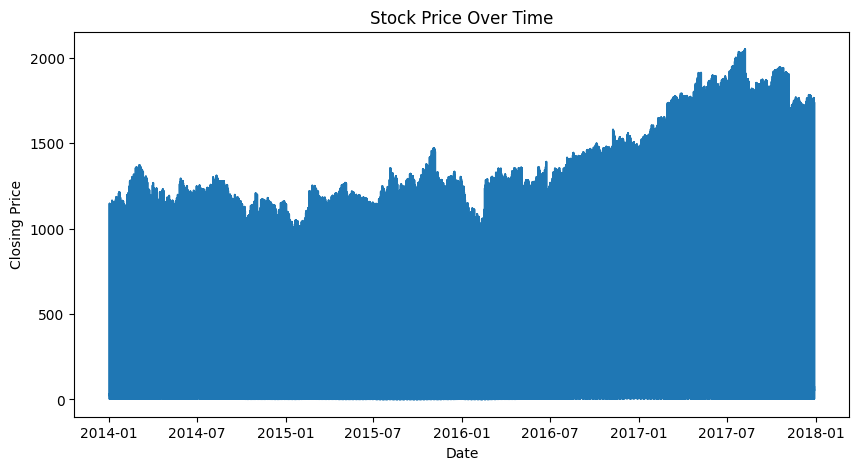

In [62]:
plt.figure(figsize=(10,5))
plt.plot(df['close'])
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

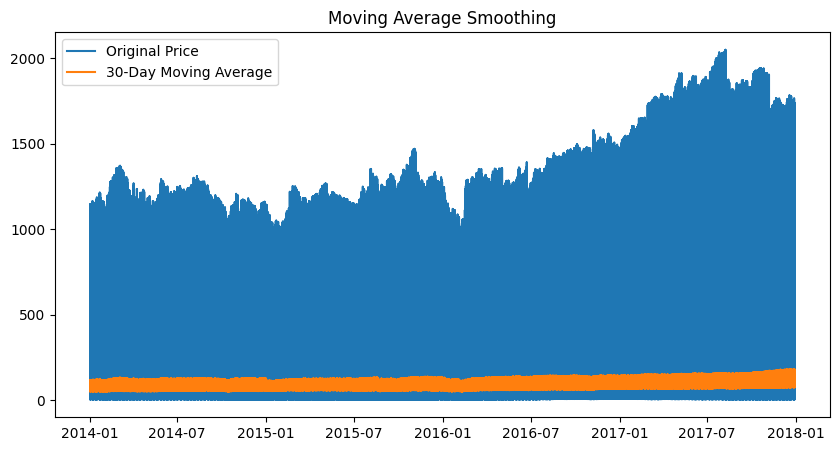

In [63]:
df['MA_30'] = df['close'].rolling(window=30).mean()

plt.figure(figsize=(10,5))
plt.plot(df['close'], label="Original Price")
plt.plot(df['MA_30'], label="30-Day Moving Average")
plt.legend()
plt.title("Moving Average Smoothing")
plt.show()

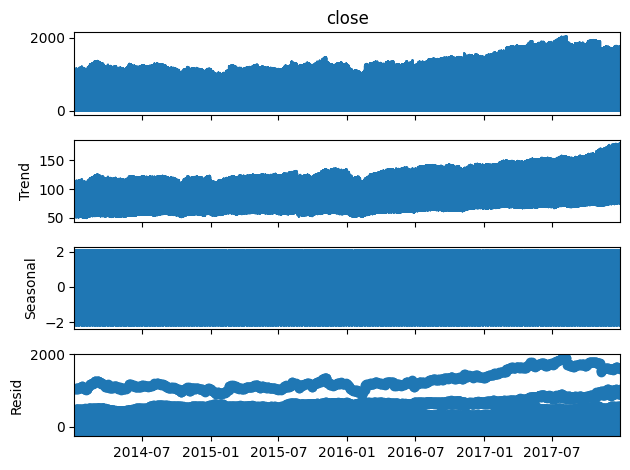

In [64]:
decomposition = seasonal_decompose(df['close'], model='additive', period=30)

decomposition.plot()
plt.show()

In [65]:
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())

Dataset Shape: (497472, 8)
Missing Values:
 symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
MA_30     29
dtype: int64


# CLUSTERING ANALYSIS (K-MEANS)

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [67]:
df1 = pd.read_csv("iris.csv")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
X = df1.drop(columns=['species'])

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


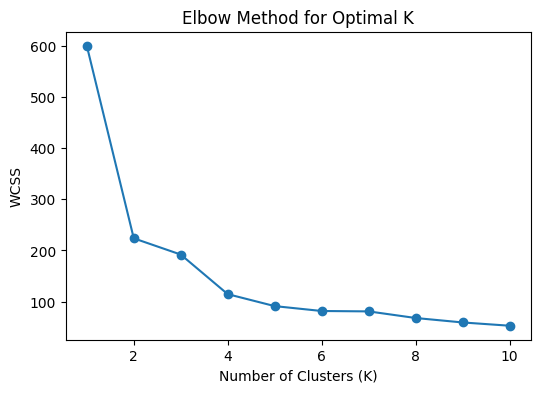

In [77]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [79]:
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X_scaled)

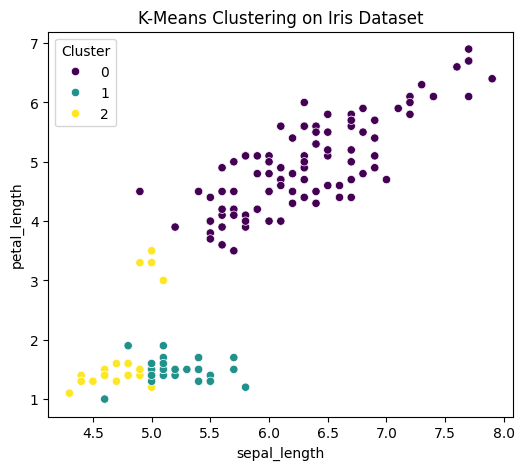

In [80]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df1['sepal_length'],
    y=df1['petal_length'],
    hue=df1['Cluster'],
    palette='viridis'
)
plt.title("K-Means Clustering on Iris Dataset")
plt.show()

In [81]:
pd.crosstab(df1['species'], df1['Cluster'])

Cluster,0,1,2
species,,,
setosa,0,32,18
versicolor,46,0,4
virginica,50,0,0
